In [26]:
!pip install cvlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 6.6 MB/s eta 0:00:000m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046371 sha256=a138d3b714ae4df7b8ddd05a118e3d81bf01ff395fc2cded5c761eec8b990328
  Stored in directory: /home/mitu/.cache/pip/wheels/bb/11/55/82ced947752cc4056335a4ee9c304a93d43ce857230538f0ae
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=bc4d0ef01585ef53aa74b25e418efaa79ce463015abd39be1c250c4abce5b79c
  Stored in directory: /home/mitu/.cache/pip/wheels/59/1b/52/0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12074 sha256=b77c815c65c365918dbb5cccdb54aa1fb1e0da99e47d7948c8502dd15a15fcd7
  Stored in d

In [9]:
# import necessary packages
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model
from keras.utils import get_file
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import cvlib as cv

In [2]:
# download pre-trained model file (one-time download)
dwnld_link = "https://github.com/arunponnusamy/cvlib/releases/download/v0.2.0/gender_detection.model"
model_path = get_file("gender_detection.model", dwnld_link,
                     cache_subdir="pre-trained", cache_dir=os.getcwd())

In [3]:
# read input image
image = cv2.imread('he.jpg')

In [4]:
# load pre-trained model
model = load_model(model_path)

In [5]:
# detect faces in the image
face, confidence = cv.detect_face(image)

In [6]:
classes = ['man','woman']

In [7]:
# loop through detected faces
for idx, f in enumerate(face):

     # get corner points of face rectangle       
    (startX, startY) = f[0], f[1]
    (endX, endY) = f[2], f[3]

    # draw rectangle over face
    cv2.rectangle(image, (startX,startY), (endX,endY), (0,255,0), 2)

    # crop the detected face region
    face_crop = np.copy(image[startY:endY,startX:endX])

    # preprocessing for gender detection model
    face_crop = cv2.resize(face_crop, (96,96))
    face_crop = face_crop.astype("float") / 255.0
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis=0)

    # apply gender detection on face
    conf = model.predict(face_crop)[0]
    print(conf)
    print(classes)

    # get label with max accuracy
    idx = np.argmax(conf)
    label = classes[idx]

    label = "{}: {:.2f}%".format(label, conf[idx] * 100)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    # write label and confidence above face rectangle
    cv2.putText(image, label, (startX, Y),  cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 2)

1/1 [==============================] - 2s 2s/step
[1.0000000e+00 1.4599664e-09]
['man', 'woman']


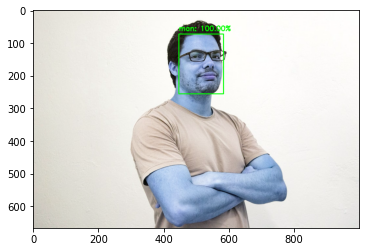

In [10]:
plt.imshow(image)